# Statistical Inference for Means
In this Notebook, we will work on confidence intervals and statistical inference for means. This particular Notebook is mostly adopted from the [Inferential Statistics](https://www.coursera.org/learn/inferential-statistics-intro/home/welcome) course of Duke University, converted from R to Python and tweaked to match the needs of our CSMODEL course.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email your instructor.

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with 'Question #' on them. Write your answer in the Canvas Quiz.
* You are expected to search how to some functions work on the Internet or via the docs. 
* The notebooks will undergo a 'Restart and Run All' command, so make sure that your code is working properly.
* You are expected to understand the dataset loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

## Import Libraries

For the statistical functions, we will be using `scipy`, specifically, the `stats` submodule. The [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) module provides a number of probability distribution functions, summary and frequency statistics, correlation functions, statistical tests, and more.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind

## Real Estate Data

Let's consider the real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor's  office. Our particular focus will be all residential home sales in Ames between 2006 and 2010.  This collection represents our **population** of interest. We would like to learn about these home sales by taking smaller samples from the full population. Let's load the data.

In [2]:
ames_df = pd.read_csv('ames.csv', index_col='Order')
ames_df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Call the [`info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function.

In [3]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS.SubClass      2930 non-null   int64  
 2   MS.Zoning        2930 non-null   object 
 3   Lot.Frontage     2440 non-null   float64
 4   Lot.Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot.Shape        2930 non-null   object 
 8   Land.Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot.Config       2930 non-null   object 
 11  Land.Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition.1      2930 non-null   object 
 14  Condition.2      2930 non-null   object 
 15  Bldg.Type        2930 non-null   object 
 16  House.Style      2930 non-null   object 
 17  Overall.Qual     29

Our dataset contains 81 variables and 2930 instances.

### Get a Sample

Here, we have access to the population data. But in most cases, we do not. Instead, we have to work with a **sample**. Let's try to take a sample from our population using the [`sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) function.

**Note**: The random state is any number that allows us to make our notebooks reproducible. The random state, in very simple terms, dictates where to start "searching" and sampling at random.

In [4]:
n = 60
ames_sample_df = ames_df.sample(n, random_state=8)
ames_sample_df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
2110,906382060,20,RL,73.0,8760,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,212999
1688,528102120,20,RL,91.0,11825,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,322400
171,902104060,50,RM,55.0,8800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,96500
1478,907412090,20,RL,85.0,11049,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,179900
2287,923228200,180,RM,NaN,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,106500


For now, we will only focus on the `Lot.Area` variable. Let us compute the summary statistics for this variable.

In [5]:
agg = ames_sample_df.agg({'Lot.Area': ['mean', 'median', 'std']})

sample_mean = agg.loc['mean'][0]
sample_median = agg.loc['median'][0]
sample_std = agg.loc['std'][0]

print('Sample Mean: {:.2f}'.format(sample_mean))
print('Sample Median: {:.2f}'.format(sample_median))
print('Sample Standard Deviation: {:.2f}'.format(sample_std))

Sample Mean: 9494.48
Sample Median: 9532.00
Sample Standard Deviation: 4278.03


C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\480311879.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_mean = agg.loc['mean'][0]
C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\480311879.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_median = agg.loc['median'][0]
C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\480311879.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_std = agg.loc['std']

**Question #1:** What is the mean of your sample? Limit to 2 decimal places.

### Confidence Interval

Based on this sample, what can we infer about the population? Based only on this single sample, the best estimate of the average living area of houses sold in Ames would be the sample mean, usually denoted as $\bar{x}$. That serves as a good point estimate but it would be useful to also communicate how uncertain we are of that estimate. This uncertainty can be quantified using a confidence interval.

A confidence interval for a population mean is computed as:

$$\bar{x} \pm ME $$

where $ME$ is also known as the **margin of error**. The margin of error is computed as:

$$ME = z^* \times \frac{s}{\sqrt{n}}$$


Where $z^*$, also known as the **critical value**.

Confidence level corresponds to the probability of getting a value within the confidence interval when sampling is repeated multiple times. On the other hand, the significance level or alpha ($\alpha$) is the probability of rejecting the null hypothesis given that the null hypothesis is true. These two have an inverse relationship, where the significance level is equivalent to $(1 - CL)$, where $CL$ is the confidence level.

To get the value of $z^*$, we can use the [`norm.ppf()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function. A 95% confidence level refers to the middle 95% of the distribution. Thus, your significance level is 0.05. Suppose that we are performing a one-tailed test, the critical value for this is computed as:

In [6]:
alpha = 0.05
z_star_95_one_tailed = norm.ppf(1 - alpha)
print('{:.2f}'.format(z_star_95_one_tailed))

1.64


When performing a two-tailed test, the value of $\alpha$ should be divided into two. You may read more about this [here](https://thedatascientist.com/comparing-significance-level-confidence-level-and-confidence-interval/). Thus, we compute $z^*$ as:

In [7]:
alpha = 0.05
z_star_95_two_tailed = norm.ppf(1 - alpha / 2)
print('{:.2f}'.format(z_star_95_two_tailed))

1.96


Let's assume that we are performing a two-tailed test. Compute and display the margin of error given a 95% confidence level. Use the variables from previous cells instead of using the actual values.

In [23]:
# Write your code here
ME =  z_star_95_two_tailed * sample_std / np.sqrt(n)
print(ME)

1082.4709424844225


**Question #2:** Given a 95% confidence level, what is the margin of error? Limit to 2 decimal places.

Again, the 95% confidence interval is the sample mean $\pm$ the margin of error. Compute and display the minimum and maximum values in the 95% confidence interval. Use the variables from previous cells instead of using the actual values.

In [26]:
# Write your code here
min = sample_mean - ME
max = sample_mean + ME
print("{:.2f}".format(min))
print("{:.2f}".format(max))


8412.01
10576.95


**Question #3:** What is the minimum value of the 95% confidence interval? Limit to 2 decimal places.

**Question #4:** What is the maximum value of the 95% confidence interval? Limit to 2 decimal places.

To recap: even though we don't know what the full population looks like, we believe that the true average size of houses in Ames lies between the lower and upper values 95% of the time. There are a few conditions that must be met for this interval to be valid. These conditions are:

- Samples must be independent
- Sample size must be at least 30 (or population is normally distributed)

### Verify if Our Confidence Interval Covers the True Mean

In this case, we have the rare luxury of knowing the true population mean since we have data on the entire population. Let's calculate this value so that we can determine if our confidence intervals actually capture it.

Let us get the mean from the population (not the sample).

Compute and display the true population mean for the variable.

In [37]:
# Write your code here
agg_popu = ames_df.agg({"Lot.Area": ["mean","median","std"]})

popu_mean = agg_popu.loc['mean'][0]
popu_median = agg_popu.loc['median'][0]
popu_std = agg_popu.loc['std'][0]

print("Mean: " + "{:.2f}".format(popu_mean))
print("Median: " + "{:.2f}".format(popu_median))
print("STD: " +  "{:.2f}".format(popu_std))


Mean: 10147.92
Median: 9436.50
STD: 7880.02


C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\3319543410.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  popu_mean = agg_popu.loc['mean'][0]
C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\3319543410.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  popu_median = agg_popu.loc['median'][0]
C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\3319543410.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  popu_std = agg_pop

**Question #5:** What is the true population mean of the variable? Limit to 2 decimal places.

**Note:** The true population mean should be within your computed confidence interval range.

### Increase the Confidence Level to 99%

Let's get another sample from the population, where `n` is 60.

In [11]:
n = 60
ames_sample_df = ames_df.sample(n, random_state=9)
ames_sample_df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
596,534226120,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,117500
1509,908275130,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,130500
2889,914476050,90,RL,78.0,10530,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,135000
223,905105200,20,RL,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,137900
910,909179020,75,RL,102.0,15863,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,197000


Let's focus on the `Lot.Area` variable again.

Compute and display the summary statistics - mean, median, and standard deviation for this variable.

In [41]:
# Write your code here
agg2 = ames_sample_df.agg({"Lot.Area" : ["mean", "median", "std"]})

sample_mean2 = agg2.loc["mean"][0]
sample_median2 = agg2.loc["median"][0]
sample_std2 = agg2.loc["std"][0]

print(sample_mean2)
print(sample_median2)
print(sample_std2)


9137.333333333334
8648.5
6308.256692397285


C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\54393624.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_mean2 = agg2.loc["mean"][0]
C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\54393624.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_median2 = agg2.loc["median"][0]
C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\54393624.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_std2 = agg2.loc["st

**Question #6:** What is the mean of your new sample? Limit to 2 decimal places.

Now, let's increase the confidence level from 95% to 99% and perform a two-tailed test. Get the value of $z^*$ or the z-score that corresponds to the middle 99% of the data.

In [43]:
# Write your code here'
alpha2 = 0.01
z_star_95_two_tailed2 = norm.ppf(1 - alpha2 / 2)

Compute and display the margin of error. Use the variables from previous cells instead of using the actual values.

In [45]:
# Write your code here
ME2 = z_star_95_two_tailed2 * sample_std2 / np.sqrt(n)
print("{:.2f}".format(ME2))

2097.74


**Question #7:** Given a 99% confidence level, what is the margin of error? Limit to 2 decimal places.

Compute and display the minimum and maximum values in the 99% confidence interval. Use the variables from previous cells instead of using the actual values.

In [46]:
# Write your code here
min2 = sample_mean2 - ME2 
max2 = sample_mean2 + ME2

print("{:.2f}".format(min2))
print("{:.2f}".format(max2))

7039.60
11235.07


**Question #8:** What is the minimum value of the 99% confidence interval? Limit to 2 decimal places.

**Question #9:** What is the maximum value of the 99% confidence interval? Limit to 2 decimal places.

**Note:** The true population mean should be within your computed confidence interval range.

From here, we have seen that even though we do not have access to the population, we can use a sample to estimate the the true population mean with the use of confidence intervals.

## Birth Records Data

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

Load the `nc` data set into our workspace.

In [16]:
nc_df = pd.read_csv('nc.csv')
nc_df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


We have observations on 13 different variables, some categorical and some numerical. The meaning of each variable is as follows.

- **`fage`**: father’s age in years.
- **`mage`**:	mother’s age in years.
- **`mature`**: maturity status of mother.
- **`weeks`**: length of pregnancy in weeks.
- **`premie`**: whether the birth was classified as premature (premie) or full-term.
- **`visits`**: number of hospital visits during pregnancy.
- **`marital`**: whether mother is married or not married at birth.
- **`gained`**: weight gained by mother during pregnancy in pounds.
- **`weight`**: weight of the baby at birth in pounds.
- **`lowbirthweight`**: whether baby was classified as low birthweight (low) or not (not low).
- **`gender`**: gender of the baby, female or male.
- **`habit`**: status of the mother as a nonsmoker or a smoker.
- **`whitemom`**:	whether mom is white or not white.

We will consider the possible relationship between a mother's smoking habit (`habit`) and the weight (`weight`) of her baby. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

Let's use a boxplot to compare the two groups:

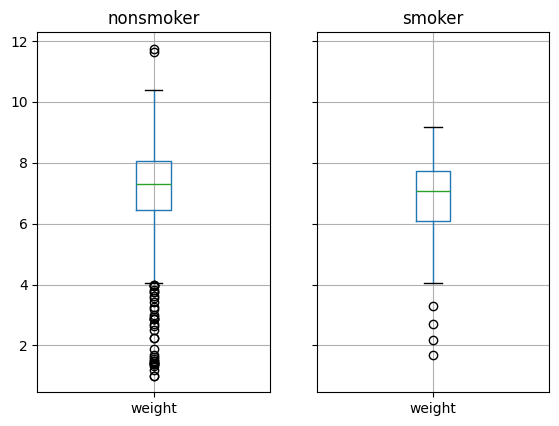

In [17]:
nc_df.groupby('habit').boxplot(column='weight')
plt.show()

Now let's look at the summary statistics across the two groups.

In [18]:
summary_stat = nc_df.groupby('habit').agg({'weight': ['mean', 'median', 'std', len]})
summary_stat

weight                      
               mean median       std  len
habit                                    
nonsmoker  7.144273   7.31  1.518681  873
smoker     6.828730   7.06  1.386180  126

It appears that babies of smokers tend to have less weight, but is this difference statistically significant? In order to answer this question, we will conduct a hypothesis test.

### Hypothesis Test

Based on the our sample, the difference in the means of the baby weights for smokers and non-smokers is:

In [19]:
non_smoker_mean = summary_stat.loc['nonsmoker'].loc['weight'].loc['mean']
smoker_mean = summary_stat.loc['smoker'].loc['weight'].loc['mean']

diff = non_smoker_mean - smoker_mean
print('{:.2f}'.format(diff))

0.32


We set up our hypotheses as follows:

$H_0$ (null hypothesis): The true difference is 0.

$H_A$ (alternative hypothesis): The true difference is not 0.

Now, we can use a $t$-test to compare the two means from the unpaired groups. We'll use the [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function. This function assumes that the null hypothesis is that the difference between the two means is 0, while the alternative hypothesis is that the diference between them is not 0. We set the `equal_var` parameter to `False` because we don't want to assume that the population has equal variances.

In [20]:
ttest_ind(nc_df[nc_df['habit'] == 'smoker']['weight'],
          nc_df[nc_df['habit'] == 'nonsmoker']['weight'],
          equal_var = False)

TtestResult(statistic=np.float64(-2.3590109449335013), pvalue=np.float64(0.01945055644373227), df=np.float64(171.3246566624258))

Note that you the function above is to perform a $t$-test for **independent means** (unpaired). We would need to use other functions if we need to perform tests for other groups. We leave this for you to find out.

**Question #10:** What can you conclude based on the $p$-value under a 5% significance level? Do we accept or reject the null hypothesis?

**Question #11:** Can we say that smoking among mothers causes their babies to be lighter?

## 90% Confidence Interval

Compute the **90%** confidence interval for the average baby weights using the `nc` dataset.

Compute and display the sample mean. No need to sample -- use the whole dataset.

In [48]:
nc_df.count()

fage               829
mage              1000
mature            1000
weeks              998
premie             998
visits             991
marital            999
gained             973
weight            1000
lowbirthweight    1000
gender            1000
habit              999
whitemom           998
dtype: int64

In [52]:
# Write your code here
agg3 = nc_df.agg({"weight":["mean", "std"]})

sample_mean3 = agg3.loc["mean"][0]
sample_std3 = agg3.loc["std"][0]

alpha3 = 0.10
z_star_95_two_tailed3 = norm.ppf(1 - alpha3 / 2)

C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\2817789584.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_mean3 = agg3.loc["mean"][0]
C:\Users\Joshua\AppData\Local\Temp\ipykernel_16112\2817789584.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_std3 = agg3.loc["std"][0]


Compute and display the minimum and maximum values in the 90% confidence interval. Use the variables from previous cells instead of using the actual values.

In [56]:
# Write your code here
ME3 = z_star_95_two_tailed3 * sample_std3 / np.sqrt(1000)
min3 = sample_mean3 - ME3
max3 = sample_mean3 + ME3

print("Min: ", "{:.2f}".format(min3))
print("Max: ", "{:.2f}".format(max3))
print("Sample Mean3 = ", "{:.2f}".format(sample_mean3))


Min:  7.02
Max:  7.18
Sample Mean3 =  7.10


**Question #12:** Is the sample mean within the confidence interval? Yes or No?